CODSOFT Artificial Intelligence Internship

Name: Mohd. Shadan Siddiqui

Task 3 - MOVIE RECOMMENDATION SYSTEM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mov = pd.read_csv("/content/ratings.csv")
mov
mov = pd.read_csv("/content/movies.csv")
mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
rat = pd.read_csv("ratings.csv")
rat

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
290998,2010,266,1.0,9.725270e+08
290999,2010,317,2.0,9.725266e+08
291000,2010,367,5.0,9.725266e+08
291001,2010,527,4.0,9.725265e+08


In [ ]:
df = pd.merge(mov, rat)
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08
...,...,...,...,...,...,...
290998,206861,"Live Like a Cop, Die Like a Man (1976)",Action|Crime|Drama|Thriller,1228,2.5,1.569763e+09
290999,207309,Fractured (2019),Thriller,973,3.5,1.571933e+09
291000,207309,Fractured (2019),Thriller,1068,3.0,1.571610e+09
291001,208002,The Kill Team (2019),Drama|War,973,3.5,1.572364e+09


In [ ]:
print(pd.isna(df).sum())

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    1
dtype: int64


In [ ]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings["num of ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [ ]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",4.000,4
$5 a Day (2008),3.750,2
'71 (2014),2.375,4
'Hellboy': The Seeds of Creation (2004),3.250,2
'Neath the Arizona Skies (1934),3.500,1


<Axes: >

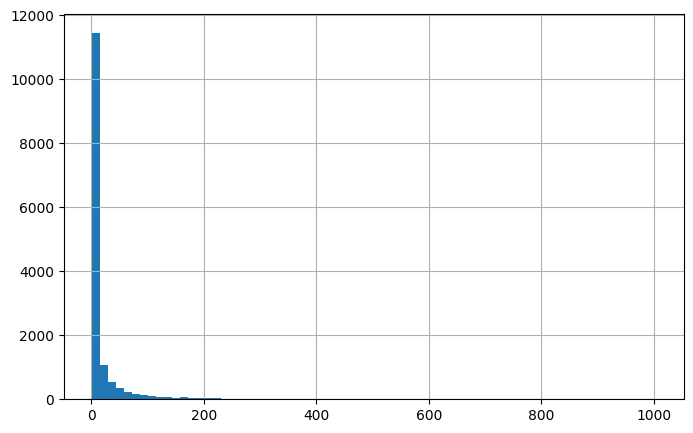

In [ ]:
plt.figure(figsize=(8,5))
ratings["num of ratings"].hist(bins=70)

<Axes: >

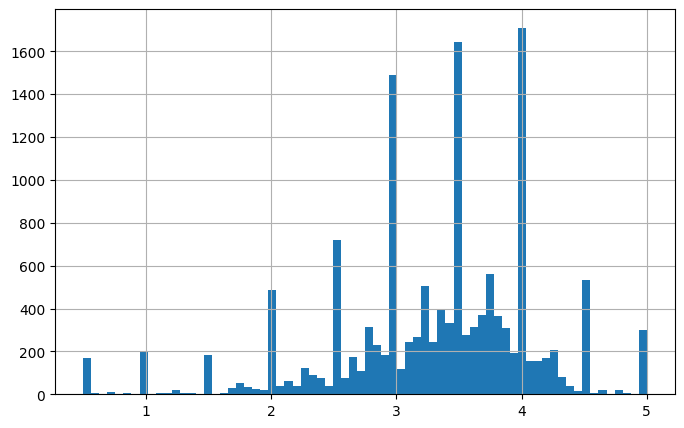

In [ ]:
plt.figure(figsize=(8,5))
ratings["rating"].hist(bins=70)

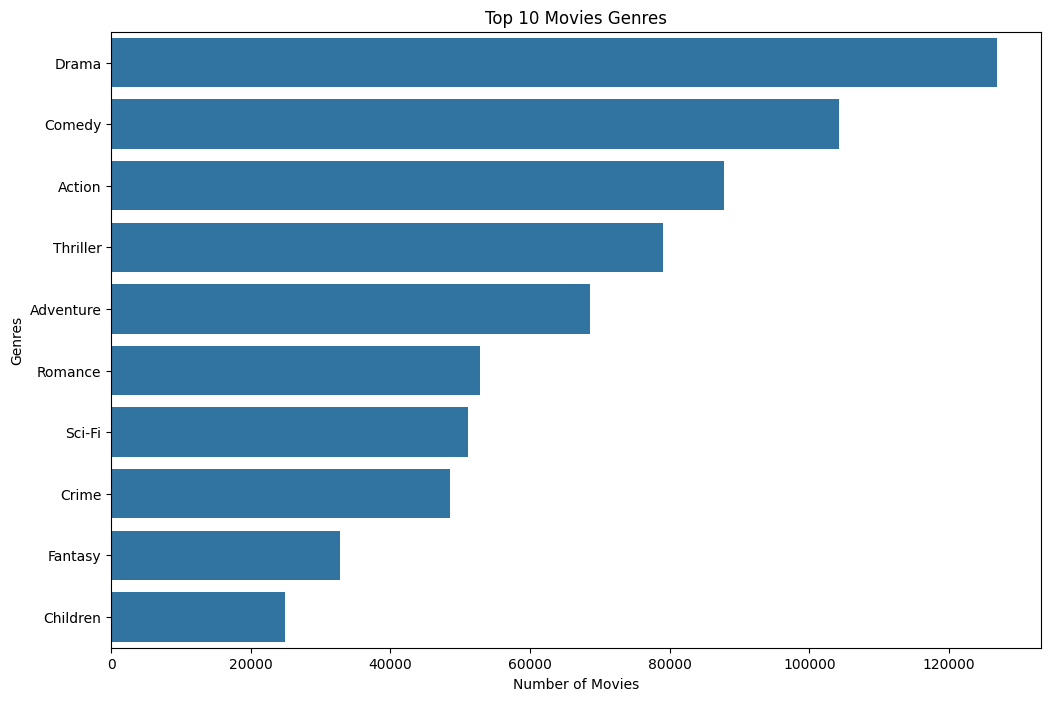

In [ ]:
catcounts = df['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=catcounts.values[:10], y=catcounts.index[:10])
plt.title('Top 10 Movies Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [ ]:
moviematrix = df.pivot_table(index="userId", columns="title", values="rating")
moviematrix

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,Šíleně smutná princezna (1968),В движении (2002),Кентервильское привидение (1970),Когда зажигаются ёлки (1950),Ландыш серебристый (2000),Начальник,Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def recommend_movies(movie_name):
    if movie_name not in moviematrix:
        return f"Movie '{movie_name}' not found in the dataset, please enter another movie name."

    #user ratings for the given movie
    user_ratings = moviematrix[movie_name]

    #the correlation with other movies
    similarmovie = moviematrix.corrwith(user_ratings)

    #dataframe for the correlation results
    corrmovie = pd.DataFrame(similarmovie, columns=["Correlation"])
    corrmovie.dropna(inplace=True)
    corrmovie = corrmovie.join(ratings["num of ratings"])

    #the top 10 similar movies with more than 100 ratings
    recommendations = corrmovie[corrmovie["num of ratings"] > 100].sort_values("Correlation", ascending=False).head(10)
    return recommendations

In [ ]:
movie_name = input("Enter a movie name: ")


In [ ]:
recommendations = recommend_movies(movie_name)
print(recommendations)